In [60]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import math

<IPython.core.display.Javascript object>


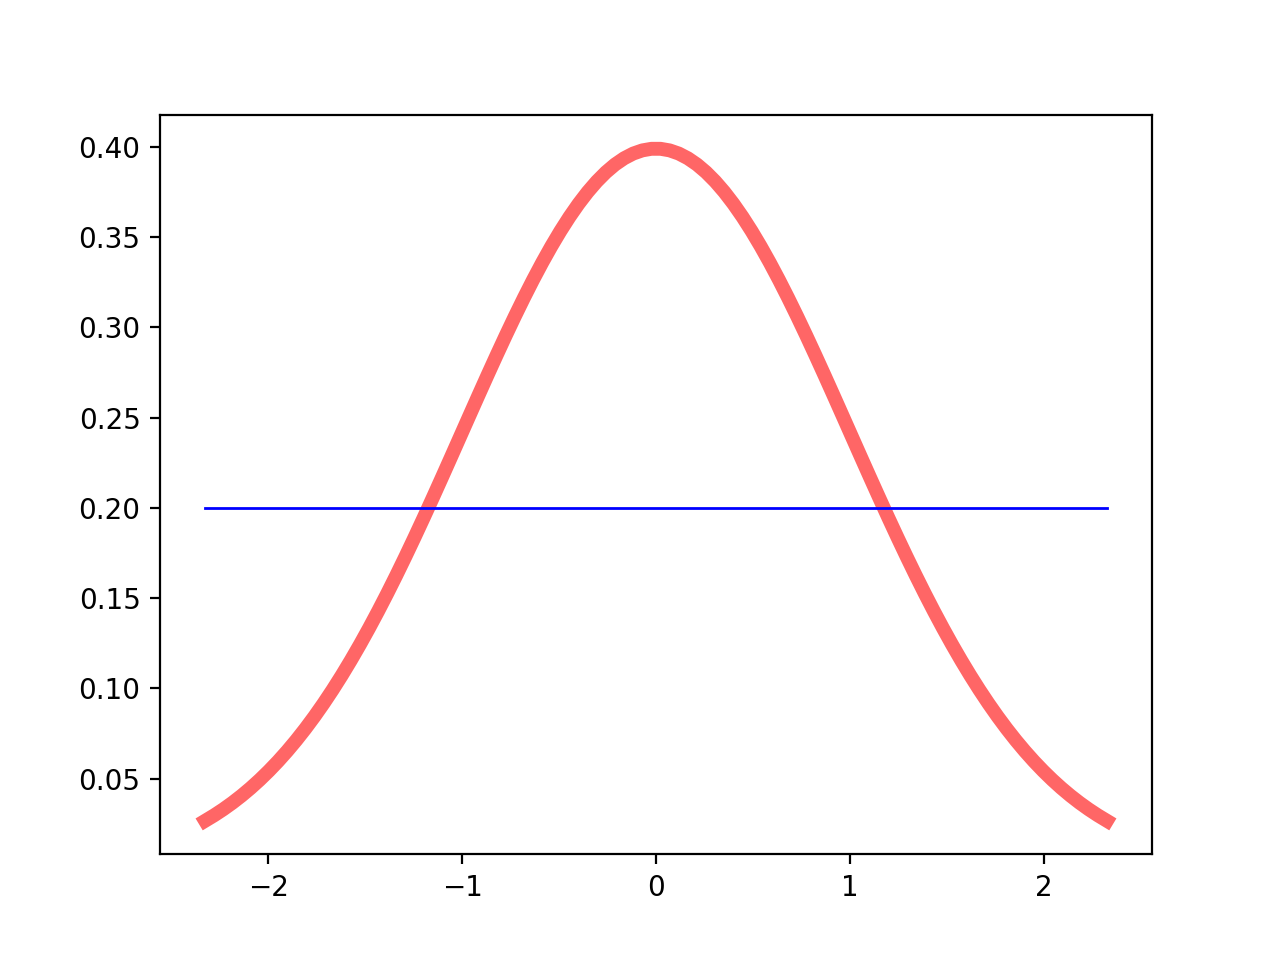

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [4]:
from xml.etree.ElementTree import parse, dump

In [12]:
# Parse the E.Coli proteome XML Document
tree = parse('data/uniprot-proteome_UP000000625.xml')
root = tree.getroot()
ns = '{http://uniprot.org/uniprot}' # MANDATORY PREFIX FOR ANY SEARCH within document
# Store all entries aka proteins in a list of xml nodes
proteins = root.findall(ns + 'entry')
# Display the xml subtree of the first protein 
dump(proteins[0])

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1989-10-01" dataset="Swiss-Prot" modified="2020-08-12" version="166">
<ns0:accession>P11446</ns0:accession>
<ns0:accession>Q2M8Q3</ns0:accession>
<ns0:name>ARGC_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName evidence="1 4">N-acetyl-gamma-glutamyl-phosphate reductase</ns0:fullName>
<ns0:shortName evidence="1 4">AGPR</ns0:shortName>
<ns0:ecNumber evidence="1 2">1.2.1.38</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName evidence="1 3">N-acetyl-glutamate semialdehyde dehydrogenase</ns0:fullName>
<ns0:shortName evidence="1 3">NAGSA dehydrogenase</ns0:shortName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name evidence="1" type="primary">argC</ns0:name>
<ns0:name type="ordered locus">b3958</ns0:name>
<ns0:name type="ordered locus">JW3930</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI

In [14]:
# Find the xml subtree of a protein with accession "P31224"
for entry in proteins:
    accessions = entry.findall(ns+"accession")
    for acc in accessions:
        if acc.text == "P00722": # prot de LacZ
            dump(entry)
            break

<ns0:entry xmlns:ns0="http://uniprot.org/uniprot" created="1986-07-21" dataset="Swiss-Prot" modified="2020-08-12" version="204">
<ns0:accession>P00722</ns0:accession>
<ns0:accession>Q2MC80</ns0:accession>
<ns0:name>BGAL_ECOLI</ns0:name>
<ns0:protein>
<ns0:recommendedName>
<ns0:fullName>Beta-galactosidase</ns0:fullName>
<ns0:shortName>Beta-gal</ns0:shortName>
<ns0:ecNumber>3.2.1.23</ns0:ecNumber>
</ns0:recommendedName>
<ns0:alternativeName>
<ns0:fullName>Lactase</ns0:fullName>
</ns0:alternativeName>
</ns0:protein>
<ns0:gene>
<ns0:name type="primary">lacZ</ns0:name>
<ns0:name type="ordered locus">b0344</ns0:name>
<ns0:name type="ordered locus">JW0335</ns0:name>
</ns0:gene>
<ns0:organism>
<ns0:name type="scientific">Escherichia coli (strain K12)</ns0:name>
<ns0:dbReference id="83333" type="NCBI Taxonomy" />
<ns0:lineage>
<ns0:taxon>Bacteria</ns0:taxon>
<ns0:taxon>Proteobacteria</ns0:taxon>
<ns0:taxon>Gammaproteobacteria</ns0:taxon>
<ns0:taxon>Enterobacterales</ns0:taxon>
<ns0:taxon>Entero

<ns0:property type="entry name" value="Glycoside_hydrolase_SF" />
</ns0:dbReference>
<ns0:dbReference id="IPR013783" type="InterPro">
<ns0:property type="entry name" value="Ig-like_fold" />
</ns0:dbReference>
<ns0:dbReference id="IPR032312" type="InterPro">
<ns0:property type="entry name" value="LacZ_4" />
</ns0:dbReference>
<ns0:dbReference id="PTHR46323" type="PANTHER">
<ns0:property type="entry name" value="PTHR46323" />
<ns0:property type="match status" value="1" />
</ns0:dbReference>
<ns0:dbReference id="PF02929" type="Pfam">
<ns0:property type="entry name" value="Bgal_small_N" />
<ns0:property type="match status" value="1" />
</ns0:dbReference>
<ns0:dbReference id="PF16353" type="Pfam">
<ns0:property type="entry name" value="DUF4981" />
<ns0:property type="match status" value="1" />
</ns0:dbReference>
<ns0:dbReference id="PF00703" type="Pfam">
<ns0:property type="entry name" value="Glyco_hydro_2" />
<ns0:property type="match status" value="1" />
</ns0:dbReference>
<ns0:dbReferenc

In [26]:
df = pd.read_csv('data/TCL_wt1.tsv',sep='\t')

In [27]:
df.head()

,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,P0CE48,Elongation factor Tu 2 OS=Escherichia coli (st...,tufB,#VALEUR!,#VALEUR!,NaN,#VALEUR!
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669


In [51]:
df = df.dropna() 
#df.head()
df_logratio = df['Log2 Corrected Abundance Ratio'].astype(float)
df_logratio.head()

0   -3.721335
1   -3.429569
2   -3.284695
4   -3.204277
5   -3.009460
Name: Log2 Corrected Abundance Ratio, dtype: float64

<IPython.core.display.Javascript object>


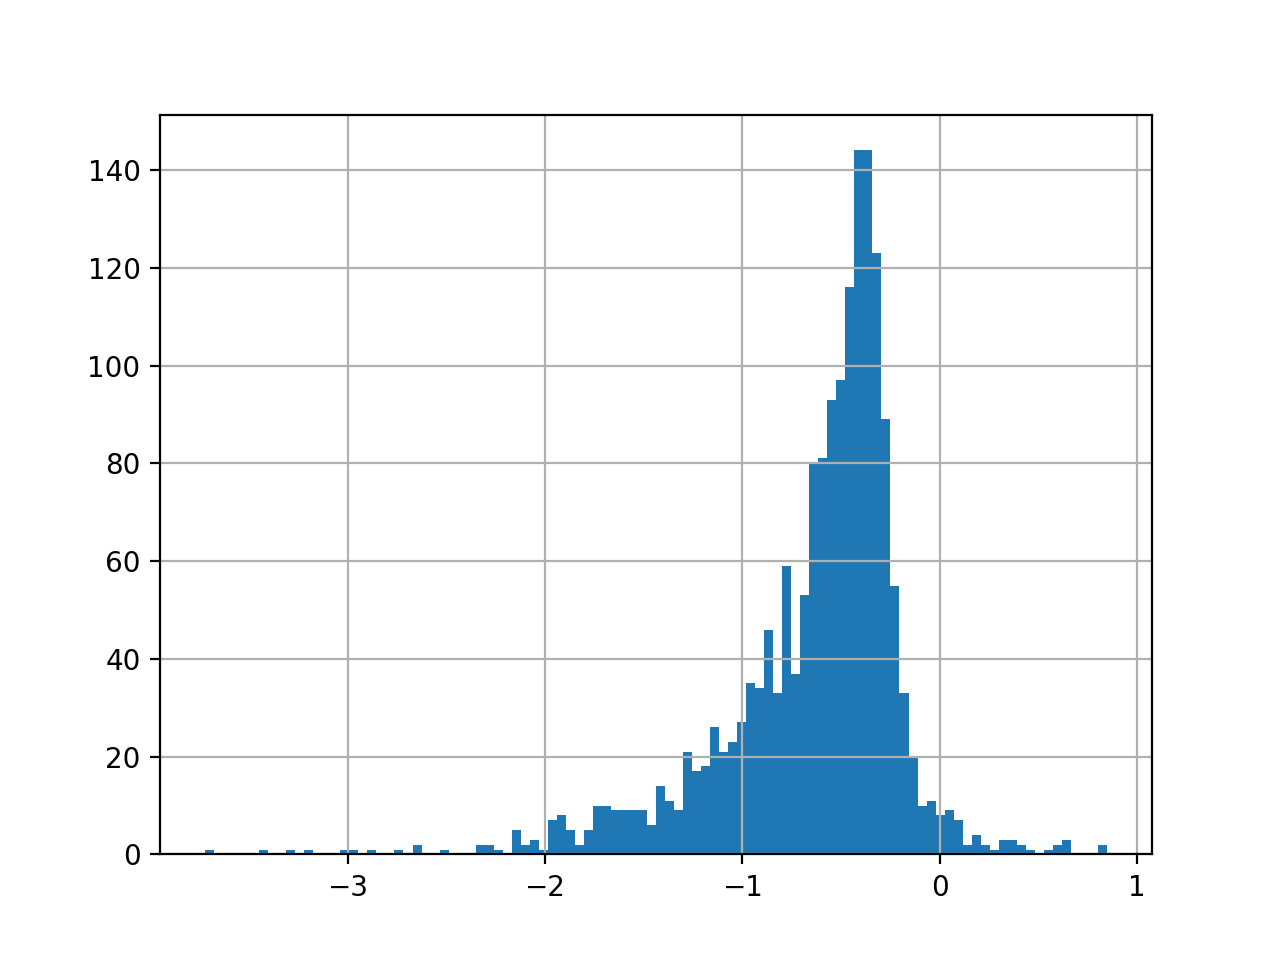

In [52]:
df_logratio.hist(bins=100)
#moyenne est plus petite que 0 
#donc quantité de prot plus grand dans condition controle 
# en x : ratio d'abundance : nb_prot_tetra/nb_prot_rich 
# le milieu riche est la condition controle 
# la tetracycline interrompt la traduction, c'est noprmal d'avoir moins de proteine dans la condition avec tetracycline

In [43]:
moy = np.mean(df_logratio)
moy

-0.6386262156443276

In [45]:
sd = np.std(df_logratio)
sd

0.47062451611275236

<IPython.core.display.Javascript object>


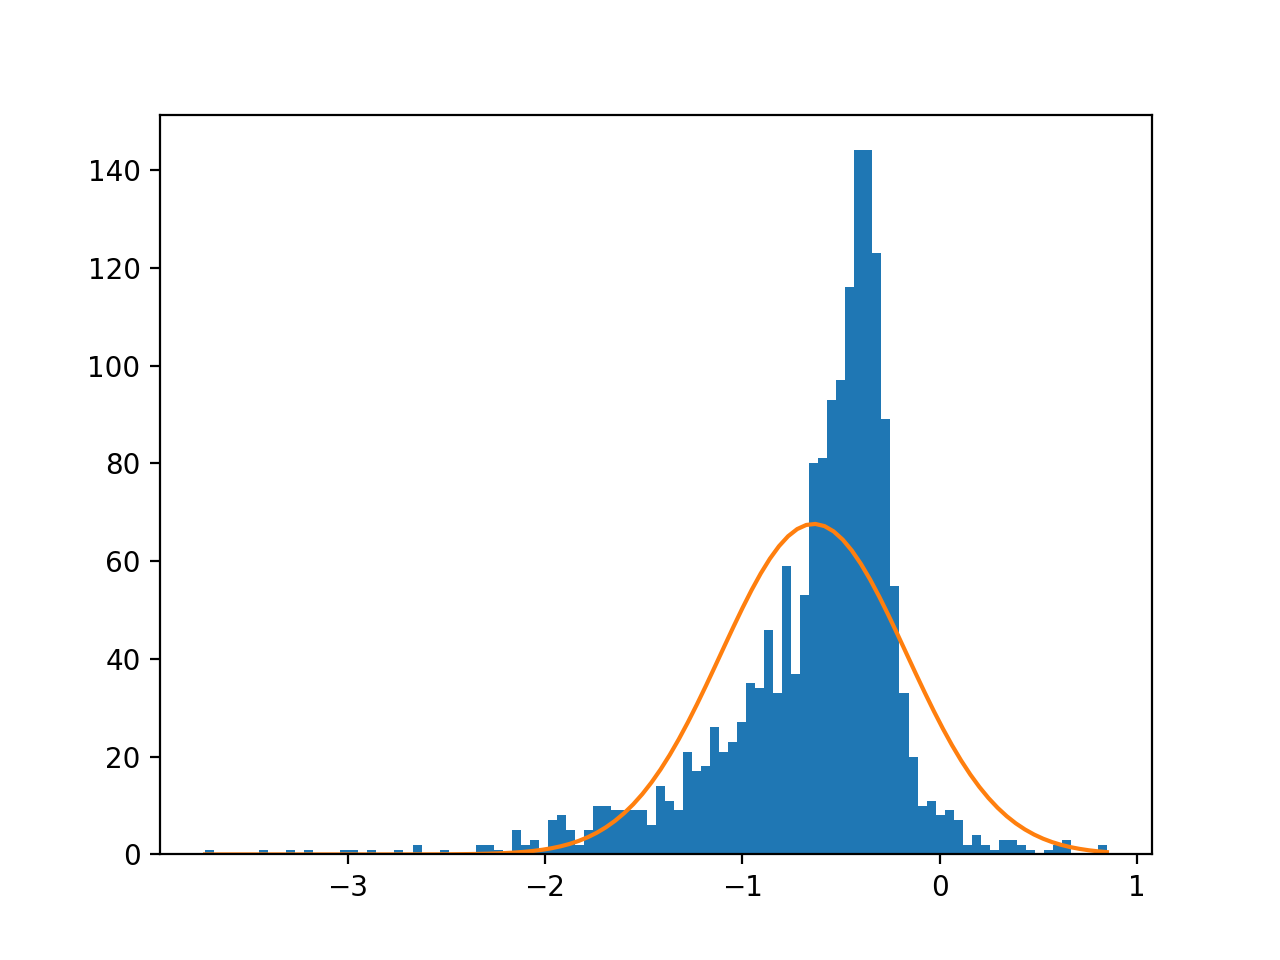

In [65]:
fig, ax = plt.subplots()
hist = ax.hist(df_logratio, bins=100) # draw histogram
x = np.linspace(min(df_logratio), max(df_logratio), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(df_logratio)*dx # scale accordingly
ax.plot(x, norm.pdf(x, moy, sd)*scale) # compute theoritical PDF and draw it
fig.show()

In [ ]:
#test 

In [ ]:
#Volcano plot